<a href="https://colab.research.google.com/github/Pranjalya/task-ts/blob/master/COVID_19_Dataset_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 Dataset Review

## Importing libraries and Data Formatting

In [0]:
# Installing basic libraries
import urllib
import os
import pandas as pd
import numpy as np
import re

In [0]:
def format_corona_data(region_df:pd.DataFrame, region_name:str):
  """
  Format data for a specific region into 
  a format that can be used with flow forecast. 
  """
  if region_name == 'county':
    region_name = region_df['full_county'].iloc[0]
  else:
    region_name = region_df['state'].iloc[0]
  #else:
    #region_name = region_df['country'].iloc[0]
  print(region_name)
  region_df['datetime'] = region_df['date']
  region_df = region_df.fillna(0)
  region_df['new_cases'] = region_df['cases'].diff()
  region_df.iloc[0]['new_cases'] = 0
  region_df = region_df.fillna(0)
  return region_df

def loop_through_geo_codes(df, column='full_county'):
  df_county_list = []
  df['full_county'] = df['state'] + "_" + df['county'] 
  for code in df['full_county'].unique():
    mask = df['full_county'] == code
    df_code = df[mask]
    ts_count = len(df_code)
    if ts_count > 60:
      df_county_list.append(df_code)
  return df_county_list 

def fetch_time_series() -> pd.DataFrame:
    """Fetch raw time series data from coronadatascraper.com
    Returns:
        pd.DataFrame: raw timeseries data at county/sub-region level
    """
    if 1==1:
        url = "https://coronadatascraper.com/timeseries.csv"
        urllib.request.urlretrieve(url, "timeseries.csv")

    time_series_df = pd.read_csv("timeseries.csv")
    return time_series_df

Getting all the data from [Corona Data Scrapper](https://coronadatascraper.com/timeseries.csv), and segregating into a list of dataframes based on unique full_county names.

In [4]:
complete_data = fetch_time_series()
seperate_counties = loop_through_geo_codes(complete_data)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Adding new_cases columns to each dataframe, which gives count daily new cases.

In [5]:
seperate_counties = list(map(lambda x: format_corona_data(x, 'county'), seperate_counties))
seperate_counties[0].columns

Flanders_Antwerp
Flanders_East Flanders
Flanders_Flemish Brabant
Flanders_West Flanders
Wallonia_Walloon Brabant
Wallonia_Hainaut
Wallonia_Liège
Wallonia_Namur
Brussels-Capital_Brussels-Capital
Nevada_Washoe County
Virginia_Accomack County
Virginia_Albemarle County
Virginia_Alexandria City
Virginia_Amherst County
Virginia_Arlington County
Virginia_Bedford County
Virginia_Botetourt County
Virginia_Charles City County
Virginia_Charlottesville City
Virginia_Chesapeake City
Virginia_Chesterfield County
Virginia_Culpeper County
Virginia_Danville City
Virginia_Fairfax County
Virginia_Fluvanna County
Virginia_Franklin County
Virginia_Frederick County


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Virginia_Fredericksburg City
Virginia_Gloucester County
Virginia_Goochland County
Virginia_Halifax County
Virginia_Hanover County
Virginia_Harrisonburg City
Virginia_Henrico County
Virginia_Isle of Wight County
Virginia_James City County
Virginia_Lee County
Virginia_Loudoun County
Virginia_Louisa County
Virginia_Madison County
Virginia_Mathews County
Virginia_Mecklenburg County
Virginia_Nelson County
Virginia_Newport News City
Virginia_Norfolk City
Virginia_Nottoway County
Virginia_Orange County
Virginia_Portsmouth City
Virginia_Prince Edward County
Virginia_Prince William County
Virginia_Roanoke County
Virginia_Rockbridge County
Virginia_Rockingham County
Virginia_Shenandoah County
Virginia_Spotsylvania County
Virginia_Stafford County
Virginia_Suffolk City
Virginia_Virginia Beach City
Virginia_Williamsburg City
Virginia_York County
Washington_Snohomish County
Alabama_Autauga County
Alabama_Baldwin County
Alabama_Blount County
Alabama_Butler County
Alabama_Calhoun County
Alabama_Chambe

Index(['name', 'level', 'city', 'county', 'state', 'country', 'population',
       'lat', 'long', 'url', 'aggregate', 'tz', 'cases', 'deaths', 'recovered',
       'active', 'tested', 'hospitalized', 'discharged', 'icu', 'growthFactor',
       'date', 'full_county', 'datetime', 'new_cases'],
      dtype='object')

## Plotting new_cases and cases with time for all counties

In [7]:
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

cf.go_offline()

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
configure_plotly_browser_state()
for sep in seperate_counties:
    print(sep['full_county'].iloc[0])
    sep.iplot(x=['datetime'],y=['new_cases', 'cases'])

## Intermediate results

From the above plots, we have a list of counties which show suspicious data, listed below.

The counties have been termed 'suspicious' if there is sudden spike in the new_cases plot, and if at a timestep there is a very steep decrease in new_cases below x-axis (0).

NOTE: All the counties of *Indiana* and *Rhode Island* show weird behaviours.

In [0]:
suspicious_df = ["Washington_Snohomish County", "Alabama_Cullman County", "Alaska_Anchorage Municipality", "Alaska_Matanuska-Susitna Borough", "Florida_Jackson County", "Indiana_\*", "Iowa_Winneshiek County", "Kentucky_Nelson County", "Louisiana_Lafayette Parish", "Louisiana_St. Landry Parish", "Michigan_Jackson County", "Michigan_Wayne County", "Missouri_Jackson County", "Missouri_St. Louis County", "Montana_Flathead County", "Montana_Gallatin County", "Montana_Missoula County", "Montana_Ravalli County", "Montana_Roosevelt County", "Montana_Yellowstone County", "Nevada_Elko County", "Nevada_Carson City", "New Hampshire_Grafton County", "New Hampshire_Merrimack County", "North Carolina_Alamance County", "North Carolina_Granville County", "North Carolina_Pitt County", "Pennsylvania_Montour County", "Pennsylvania_Philadelphia County", "Rhode Island_\*", "Texas_Bowie County", "Washington_Franklin County", "Washington_Grant County", "Washington_Kittitas"]

There are  counties which are just filled with zeroes, and should be removed, listed below.

In [0]:
empty_df = ["Grand Est_Aube", "Occitania_Aude", "Occitania_Aveyron", "Provence-Alpes-Côte d'Azur_Bouches-du-Rhône", "Normandy_Calvados", "Auvergne-Rhône-Alpes_Cantal", "New Aquitaine_Charente", "New Aquitaine_Charente-Maritime", "Centre-Loire Valley_Cher", "New Aquitaine_Corrèze", "Bourgogne-Franche-Comté_Côte-d'Or", "Brittany_Côtes-d'Armor", "New Aquitaine_Creuse", "New Aquitaine_Dordogne", "Bourgogne-Franche-Comté_Doubs", "Auvergne-Rhône-Alpes_Drôme", "Normandy_Eure", "Centre-Loire Valley_Eure-et-Loir", "Brittany_Finistère", "Occitania_Gard", "Occitania_Haute-Garonne", "Occitania_Gers", "New Aquitaine_Gironde", "Occitania_Hérault", "Brittany_Ille-et-Vilaine", "Centre-Loire Valley_Indre", "Centre-Loire Valley_Indre-et-Loire", "Auvergne-Rhône-Alpes_Isère", "Bourgogne-Franche-Comté_Jura", "New Aquitaine_Landes", "Centre-Loire Valley_Loir-et-Cher", "Auvergne-Rhône-Alpes_Loire", "Auvergne-Rhône-Alpes_Haute-Loire", "Pays de la Loire_Loire-Atlantique", "Centre-Loire Valley_Loiret", "Occitania_Lot", "New Aquitaine_Lot-et-Garonne", "Occitania_Lozère", "Pays de la Loire_Maine-et-Loire", "Normandy_Manche", "Grand Est_Marne", "Grand Est_Haute-Marne", "Pays de la Loire_Mayenne", "Grand Est_Meurthe-et-Moselle", "Grand Est_Meuse", "Brittany_Morbihan", "Grand Est_Moselle", "Bourgogne-Franche-Comté_Nièvre", "Hauts-de-France_Nord", "Hauts-de-France_Oise", "Normandy_Orne", "Hauts-de-France_Pas-de-Calais", "Auvergne-Rhône-Alpes_Puy-de-Dôme", "New Aquitaine_Pyrénées-Atlantiques", "Occitania_Hautespyrenees", "Occitania_Pyrénées-Orientales", "Grand Est_Bas-Rhin", "Grand Est_Haut-Rhin", "Auvergne-Rhône-Alpes_Rhône", "Bourgogne-Franche-Comté_Haute-Saône", "Bourgogne-Franche-Comté_Saône-et-Loire", "Pays de la Loire_Sarthe", "Auvergne-Rhône-Alpes_Savoy", "Auvergne-Rhône-Alpes_Upper Savoy", "Ile-de-France_Paris", "Normandy_Seine-Maritime", "Ile-de-France_Seine-et-Marne", "Ile-de-France_Yvelines", "New Aquitaine_Deux-Sèvres", "Hauts-de-France_Somme", "Occitania_Tarn", "Occitania_Tarn-et-Garonne", "Provence-Alpes-Côte d'Azur_Var", "Provence-Alpes-Côte d'Azur_Vaucluse", "Pays de la Loire_Vendée", "New Aquitaine_Vienne", "New Aquitaine_Haute-Vienne", "Grand Est_Vosges", "Bourgogne-Franche-Comté_Yonne", "Bourgogne-Franche-Comté_Territoire-de-Belfort", "Ile-de-France_Essonne", "Ile-de-France_Hauts-de-Seine", "Ile-de-France_Seine-Saint-Denis", "Ile-de-France_Val-de-Marne", "Ile-de-France_Val-d'Oise", "Auvergne-Rhône-Alpes_Ain", "Hauts-de-France_Aisne", "Auvergne-Rhône-Alpes_Allier", "Provence-Alpes-Côte d'Azur_Alpes-de-Haute-Provence", "Provence-Alpes-Côte d'Azur_Hautes-Alpes", "Provence-Alpes-Côte d'Azur_Maritime Alps", "Auvergne-Rhône-Alpes_Ardèche", "Grand Est_Ardennes", "Occitania_Ariège", "Corsica_South Corsica", "Corsica_Haute-Corse"]

Exploring the suspicious counties' data, to ensure based on the recovered and death counts, whether the suspicious data could be valid.

In [9]:
configure_plotly_browser_state()
for sep in seperate_counties:
    if sep['full_county'].iloc[0] in suspicious_df:
        print(sep['full_county'].iloc[0])
        sep.iplot(x=['datetime'],y=['new_cases', 'cases', 'deaths', 'recovered'])

Washington_Snohomish County


Alabama_Cullman County


Alaska_Anchorage Municipality


Alaska_Matanuska-Susitna Borough


Florida_Jackson County


Iowa_Winneshiek County


Kentucky_Nelson County


Louisiana_Lafayette Parish


Louisiana_St. Landry Parish


Michigan_Jackson County


Michigan_Wayne County


Mississippi_Harrison County


Missouri_Jackson County


Missouri_St. Louis County


Montana_Flathead County


Montana_Gallatin County


Montana_Missoula County


Montana_Ravalli County


Montana_Roosevelt County


Montana_Yellowstone County


Nevada_Elko County


Nevada_Carson City


New Hampshire_Grafton County


New Hampshire_Merrimack County


North Carolina_Alamance County


North Carolina_Granville County


North Carolina_Pitt County


Pennsylvania_Montour County


Pennsylvania_Philadelphia County


Texas_Bowie County


Washington_Franklin County


Washington_Grant County


In [13]:
configure_plotly_browser_state()
for sep in seperate_counties:
    if re.match('^(Indiana|Rhode Island)', sep['full_county'].iloc[0]):
        print(sep['full_county'].iloc[0])
        sep.iplot(x=['datetime'],y=['new_cases', 'cases', 'deaths', 'recovered'])

Indiana_Adams County


Indiana_Allen County


Indiana_Bartholomew County


Indiana_Boone County


Indiana_Brown County


Indiana_Clark County


Indiana_Dearborn County


Indiana_Decatur County


Indiana_DeKalb County


Indiana_Delaware County


Indiana_Dubois County


Indiana_Elkhart County


Indiana_Fayette County


Indiana_Floyd County


Indiana_Franklin County


Indiana_Gibson County


Indiana_Grant County


Indiana_Hamilton County


Indiana_Hancock County


Indiana_Harrison County


Indiana_Hendricks County


Indiana_Howard County


Indiana_Jackson County


Indiana_Jasper County


Indiana_Jennings County


Indiana_Johnson County


Indiana_Lake County


Indiana_LaPorte County


Indiana_Lawrence County


Indiana_Madison County


Indiana_Marion County


Indiana_Miami County


Indiana_Monroe County


Indiana_Montgomery County


Indiana_Morgan County


Indiana_Noble County


Indiana_Ohio County


Indiana_Owen County


Indiana_Porter County


Indiana_Putnam County


Indiana_Ripley County


Indiana_Rush County


Indiana_St. Joseph County


Indiana_Scott County


Indiana_Shelby County


Indiana_Starke County


Indiana_Sullivan County


Indiana_Tippecanoe County


Indiana_Tipton County


Indiana_Vanderburgh County


Indiana_Vigo County


Indiana_Warrick County


Indiana_Washington County


Indiana_Wayne County


Indiana_Wells County


Rhode Island_Bristol County


Rhode Island_Kent County


Rhode Island_Newport County


Rhode Island_Providence County


Rhode Island_Washington County


There doesn't seem to be much error in data in the following counties, but the plots come out weird.

Checking with another plotting library.

In [0]:
temp = ["Alaska_Anchorage Municipality", "Alaska_Matanuska-Susitna Borough", "Michigan_Wayne County", "Rhode Island_Bristol County", "Rhode Island_Kent County", "Rhode Island_Newport County", "Rhode Island_Washington County", ]

Alaska_Anchorage Municipality


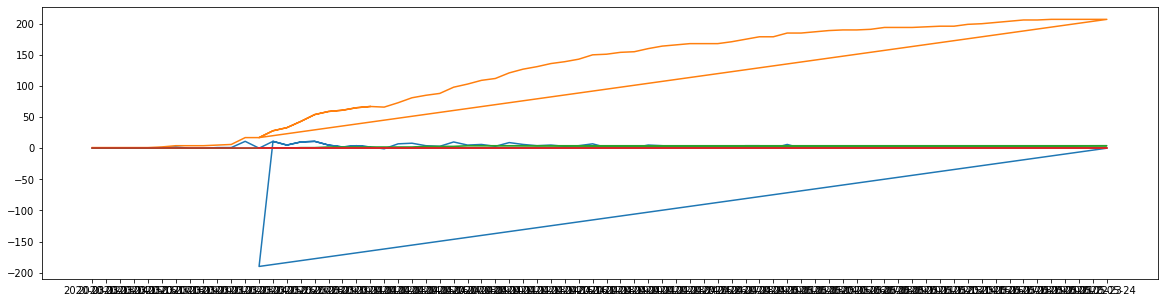

Alaska_Matanuska-Susitna Borough


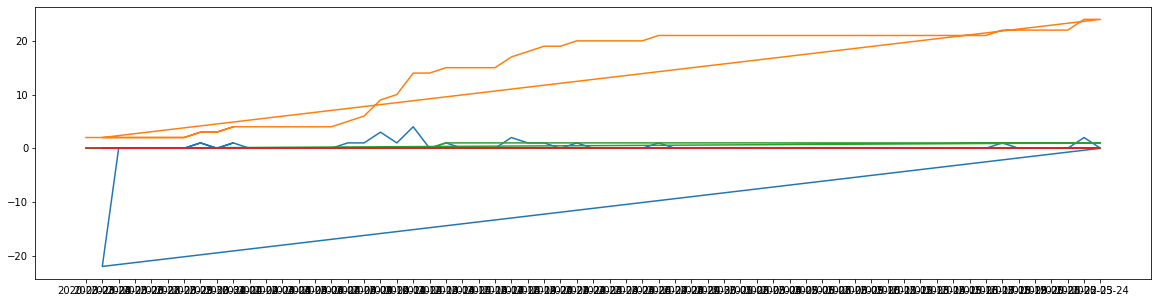

Michigan_Wayne County


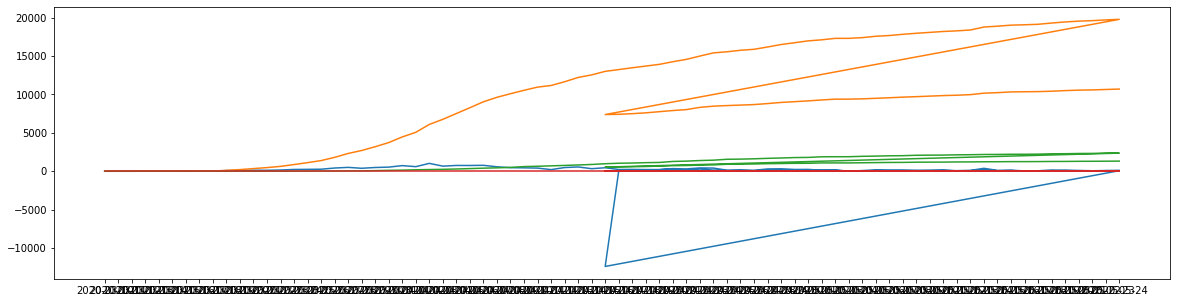

Rhode Island_Bristol County


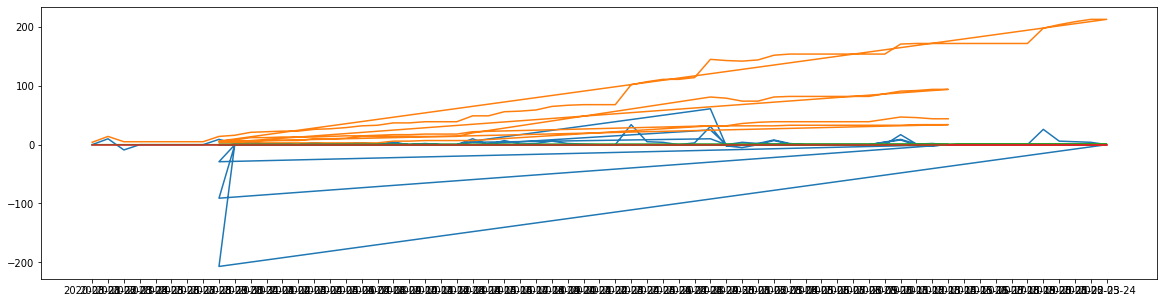

Rhode Island_Kent County


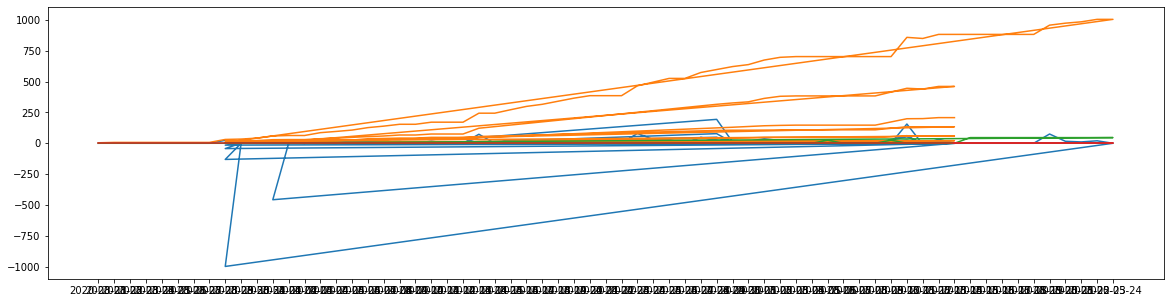

Rhode Island_Newport County


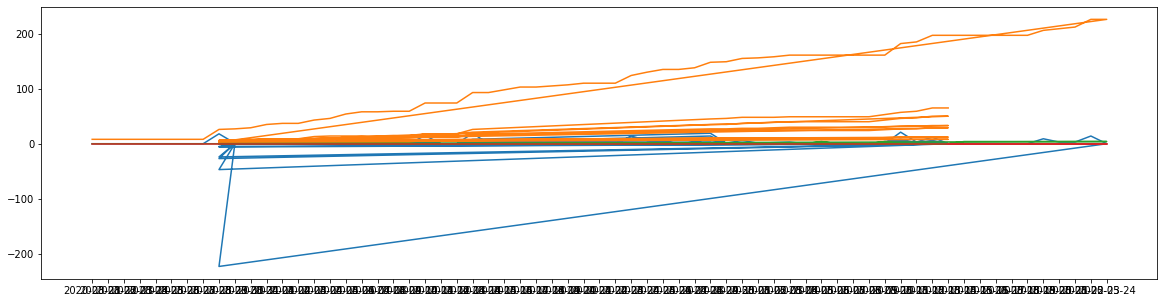

Rhode Island_Washington County


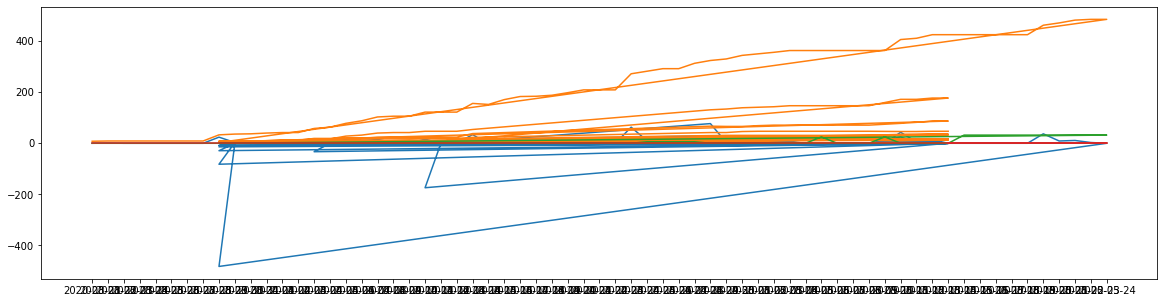

In [7]:
import matplotlib.pyplot as plt
for sep in seperate_counties:
    if sep['full_county'].iloc[0] in temp:
        print(sep['full_county'].iloc[0])
        plt.rcParams["figure.figsize"] = (20,5)
        plt.plot(sep['datetime'], sep['new_cases'])
        plt.plot(sep['datetime'], sep['cases'])
        plt.plot(sep['datetime'], sep['deaths'])
        plt.plot(sep['datetime'], sep['recovered'])
        plt.show()
        # sep.iplot(x=['datetime'],y=['new_cases', 'cases', 'deaths', 'recovered'])

It doesn't seem to be error in plotting libraries. Let's take a look at the data.

In [9]:
for sep in seperate_counties:
    if sep['full_county'].iloc[0] in temp:
        print(sep[sep['new_cases']<-5])

7
                                      name   level  ...    datetime new_cases
238368  Anchorage Economic Region, AK, USA  county  ...  2020-03-24    -190.0

[1 rows x 25 columns]
                                   name   level  ...    datetime new_cases
238395  Mat-Su Economic Region, AK, USA  county  ...  2020-03-24     -22.0

[1 rows x 25 columns]
                                                     name  ... new_cases
252600  Detroit City, Wayne County, Michigan, United S...  ...  -12388.0

[1 rows x 25 columns]
                                                     name  ... new_cases
155510        Bristol County, Rhode Island, United States  ...      -9.0
242152  Barrington, Bristol County, Rhode Island, Unit...  ...    -207.0
242183  Bristol, Bristol County, Rhode Island, United ...  ...     -29.0
243144  Warren, Bristol County, Rhode Island, United S...  ...     -91.0

[4 rows x 25 columns]
                                                     name  ... new_cases
155625          

As we can see they've quite volatile data in between, so they cannot be used.

## Checking the sources and Final List

In [0]:
empty_counties = ["Grand Est_Aube", "Occitania_Aude", "Occitania_Aveyron", "Provence-Alpes-Côte d'Azur_Bouches-du-Rhône", "Normandy_Calvados", "Auvergne-Rhône-Alpes_Cantal", "New Aquitaine_Charente", "New Aquitaine_Charente-Maritime", "Centre-Loire Valley_Cher", "New Aquitaine_Corrèze", "Bourgogne-Franche-Comté_Côte-d'Or", "Brittany_Côtes-d'Armor", "New Aquitaine_Creuse", "New Aquitaine_Dordogne", "Bourgogne-Franche-Comté_Doubs", "Auvergne-Rhône-Alpes_Drôme", "Normandy_Eure", "Centre-Loire Valley_Eure-et-Loir", "Brittany_Finistère", "Occitania_Gard", "Occitania_Haute-Garonne", "Occitania_Gers", "New Aquitaine_Gironde", "Occitania_Hérault", "Brittany_Ille-et-Vilaine", "Centre-Loire Valley_Indre", "Centre-Loire Valley_Indre-et-Loire", "Auvergne-Rhône-Alpes_Isère", "Bourgogne-Franche-Comté_Jura", "New Aquitaine_Landes", "Centre-Loire Valley_Loir-et-Cher", "Auvergne-Rhône-Alpes_Loire", "Auvergne-Rhône-Alpes_Haute-Loire", "Pays de la Loire_Loire-Atlantique", "Centre-Loire Valley_Loiret", "Occitania_Lot", "New Aquitaine_Lot-et-Garonne", "Occitania_Lozère", "Pays de la Loire_Maine-et-Loire", "Normandy_Manche", "Grand Est_Marne", "Grand Est_Haute-Marne", "Pays de la Loire_Mayenne", "Grand Est_Meurthe-et-Moselle", "Grand Est_Meuse", "Brittany_Morbihan", "Grand Est_Moselle", "Bourgogne-Franche-Comté_Nièvre", "Hauts-de-France_Nord", "Hauts-de-France_Oise", "Normandy_Orne", "Hauts-de-France_Pas-de-Calais", "Auvergne-Rhône-Alpes_Puy-de-Dôme", "New Aquitaine_Pyrénées-Atlantiques", "Occitania_Hautespyrenees", "Occitania_Pyrénées-Orientales", "Grand Est_Bas-Rhin", "Grand Est_Haut-Rhin", "Auvergne-Rhône-Alpes_Rhône", "Bourgogne-Franche-Comté_Haute-Saône", "Bourgogne-Franche-Comté_Saône-et-Loire", "Pays de la Loire_Sarthe", "Auvergne-Rhône-Alpes_Savoy", "Auvergne-Rhône-Alpes_Upper Savoy", "Ile-de-France_Paris", "Normandy_Seine-Maritime", "Ile-de-France_Seine-et-Marne", "Ile-de-France_Yvelines", "New Aquitaine_Deux-Sèvres", "Hauts-de-France_Somme", "Occitania_Tarn", "Occitania_Tarn-et-Garonne", "Provence-Alpes-Côte d'Azur_Var", "Provence-Alpes-Côte d'Azur_Vaucluse", "Pays de la Loire_Vendée", "New Aquitaine_Vienne", "New Aquitaine_Haute-Vienne", "Grand Est_Vosges", "Bourgogne-Franche-Comté_Yonne", "Bourgogne-Franche-Comté_Territoire-de-Belfort", "Ile-de-France_Essonne", "Ile-de-France_Hauts-de-Seine", "Ile-de-France_Seine-Saint-Denis", "Ile-de-France_Val-de-Marne", "Ile-de-France_Val-d'Oise", "Auvergne-Rhône-Alpes_Ain", "Hauts-de-France_Aisne", "Auvergne-Rhône-Alpes_Allier", "Provence-Alpes-Côte d'Azur_Alpes-de-Haute-Provence", "Provence-Alpes-Côte d'Azur_Hautes-Alpes", "Provence-Alpes-Côte d'Azur_Maritime Alps", "Auvergne-Rhône-Alpes_Ardèche", "Grand Est_Ardennes", "Occitania_Ariège", "Corsica_South Corsica", "Corsica_Haute-Corse"]

We can see that all of the empty counties are the counties of France, so there seems to be some issue in French data scraper.

In [0]:
suspicious_df.remove('Indiana_\*')
suspicious_df.remove('Rhode Island_\*')

In [0]:
for sep in seperate_counties:
    if re.match('^(Indiana|Rhode Island)', sep['full_county'].iloc[0]):
        suspicious_df.append(sep['full_county'].iloc[0])

In [18]:
for sep in seperate_counties:
    if sep['full_county'].iloc[0] in suspicious_df:
        print(sep['full_county'].iloc[0], " : ", sep['url'].iloc[0])
    if sep['full_county'].iloc[0] in empty_df:
        print(sep['full_county'].iloc[0], " : ", sep['url'].iloc[0])

Washington_Snohomish County  :  https://services8.arcgis.com/rGGrs6HCnw87OFOT/arcgis/rest/services/CountyCases/FeatureServer/0/query?f=json&where=(CV_State_Cases%3E0)&returnGeometry=false&outFields=*&orderByFields=CNTY_NAME%20asc
Alabama_Cullman County  :  https://opendata.arcgis.com/datasets/ff8de7707f6a422a8af6b155facc6327_0.csv
Alaska_Anchorage Municipality  :  https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv
Alaska_Matanuska-Susitna Borough  :  https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv
Florida_Jackson County  :  https://opendata.arcgis.com/datasets/a7887f1940b34bf5a02c6f7f27a5cb2c_0.csv
Indiana_Adams County  :  https://opendata.arcgis.com/datasets/d14de7e28b0448ab82eb36d6f25b1ea1_0.csv
Indiana_Allen County  :  https://opendata.arcgis.com/datasets/d14de7e28b0448ab82eb36d6f25b1ea1_0.csv
Indiana_Bartholomew County  :  https://opendata.arcgis.com/datasets/d14de7e28b0448ab82eb36d6f25b1ea1_0.csv
Indiana_Boone County  :  h

The provided URLs just point to the CSV files, and I was unable to glean much information from them.

I went through the [COVID Data Scrapper site](https://coronadatascraper.com), and [here](https://docs.google.com/spreadsheets/d/1T2cSvWvUvurnOuNFj2AMPGLpuR2yVs3-jdd_urfWU4c) is the Spreadsheet they maintain for the data sources.

I have raised the issue regarding the missing data [here](https://github.com/covidatlas/coronadatascraper/issues/1034), and the issue regarding erronious data [here](https://github.com/covidatlas/coronadatascraper/issues/1035).

**So, finally I would suggest to not use data from these sources and counties.**